In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, v_measure_score
import matplotlib.pyplot as plt

In [4]:
# Load and label datasets
df_ai = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset_large/analysis/normal_large_ai_anal_output.csv')
df_human = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset_large/analysis/normal_large_human_large_anal_output.csv')

df_ai['label'] = 'AI'
df_human['label'] = 'Human'

df = pd.concat([df_ai, df_human], ignore_index=True)


In [5]:
# Encode labels for evaluation
label_map = {'AI': 0, 'Human': 1}
y_true = df['label'].map(label_map).values

# Select and scale features
features = ['spectral_centroid', 'spectral_bandwidth'] 
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=2, random_state=42)
df['cluster'] = gmm.fit_predict(X_scaled)

In [6]:
# Evaluate clustering
ari = adjusted_rand_score(y_true, df['cluster'])
v_score = v_measure_score(y_true, df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"V-Measure Score: {v_score:.3f}")

Adjusted Rand Index (ARI): -0.004
V-Measure Score: 0.057


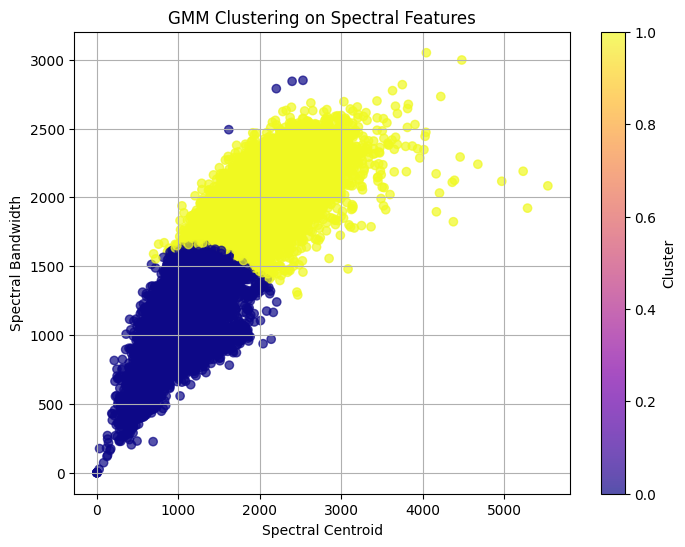

In [8]:
# Visualise
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['spectral_centroid'], df['spectral_bandwidth'], 
                      c=df['cluster'], cmap='plasma', alpha=0.7)
plt.xlabel('Spectral Centroid')
plt.ylabel('Spectral Bandwidth')
plt.title('GMM Clustering on Spectral Features')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)

plt.savefig('gmm_clustering_plot_large.png', dpi=300, bbox_inches='tight')

plt.show()